In [11]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def signal_distort_noise(
    n_samples, sampling_rate=1000, noise_frequency=100, noise_amplitude=0.1, noise_shape="normal"):

    _noise = np.zeros(n_samples)
    # # Apply a very conservative Nyquist criterion in order to ensure
    # # sufficiently sampled signals.
    nyquist = sampling_rate * 0.4
    if noise_frequency > nyquist:
        print(
            f"Skipping requested noise frequency of"
            f"{noise_frequency} Hz since it cannot be resolved at "
            f" the sampling rate of {sampling_rate} Hz. Please increase "
            f" sampling rate to {noise_frequency * 2.5} Hz or choose "
            f" frequencies smaller than or equal to {nyquist} Hz."
        )

    duration = n_samples / sampling_rate
    if (1 / noise_frequency) > duration:
        print(
                f"Skipping requested noise frequency "
                f" of {noise_frequency} Hz since its period of {1 / noise_frequency} "
                f" seconds exceeds the signal duration of {duration} seconds. "
                f" Please choose noise frequencies larger than "
                f" {1 / duration} Hz or increase the duration of the "
                f" signal above {1 / noise_frequency} seconds.",
        )

    noise_duration = int(duration * noise_frequency)

    if noise_shape in ["normal", "gaussian"]:
        _noise = np.random.normal(0, noise_amplitude, noise_duration)

    if len(_noise) != n_samples:
        _noise = scipy.ndimage.zoom(_noise, n_samples / len(_noise))

    return _noise

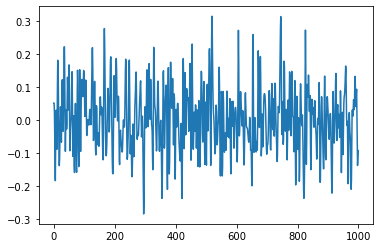

In [12]:
_noise = _signal_distort_noise(n_samples=1000, sampling_rate=100, noise_frequency=40, noise_amplitude=0.1, noise_shape="normal", silent=False)

plt.plot(_noise)

In [ ]:
signal_with_3Hz_Noise = add_distort_noise(signal, n_samples=1000, sampling_rate=100, noise_frequency=20,  noise_amplitude=0.3, show=True)
noise = signal_with_3Hz_Noise - signal
plt.plot(noise)
plt.show()
fft_result_noise = np.fft.fft(noise)
fft_freq_noise = np.fft.fftfreq(len(noise), 1/fs)
spectrum_noise = np.abs(fft_result_noise)
plt.plot(fft_freq_noise[:len(fft_freq_noise) // 2], fft_result_noise[:len(fft_result_noise) // 2], label='Frequency of Noise')
# plt.title('Frequency Domain');plt.xlabel('Frequency (Hz)');plt.ylabel('Magnitude');plt.legend();plt.show()
plt.show()